# 人脸识别之KPCA实现
## 导入MyKPCA及必要类库

In [1]:
from KPCA import MyKPCA
from preprocess import read_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 读取数据并划分数据集

In [2]:
path = 'Grp13Dataset/'
wide = 70
height = 80
images, labels = read_img(path, wide, height)
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.3)

## 进行训练与预测
首先进行一个简单的使用,根据讲义要求, $ratio$ 默认取 0.99
这里选用 $linear$ 线性核函数, $\gamma$ 取 2

In [3]:
model = MyKPCA()
model.train(train_x, train_y)
acc = model.predict(test_x, test_y)
print("n_components: " + str(model.n_components) +" accuracy:" + str(acc))

n_components: 227 accuracy:0.943089430894309


对比模型预测的标签和真实标签,可以看出模型的精度较高

In [4]:
print("predicted_labels: ", model.predicted_labels)
print("true_labels: ", test_y)

predicted_labels:  [27  1 17 16 22 31  6  9 41  6 39 38  3 18 26 19  7 32 37 14 34 21  9 30
 27  8 21  2 19 37 36 30 24 29  2 12 25  4  3 34 15 36 38 20 20 16 23 37
 12 24 24 33 25 28 11 27 29 19 11  4  8  7  1 27 26  4 20  5  1 22 40 33
 26 15 37 10 12  6 35 37 13  5 32 22 40  7 33 25 29 38 30 11  1  8 20 39
 40 16 32  5 23 20  9  8 17 41 24 19  5  8  2 38  3 17 15 14  3 14  9 38
  2 35 15]
true_labels:  [27  1 17 16 22 31  6  9 41  6 39 38  3 18 26 19  7 32 37 14 34 21  9 30
 27  8 21  2 11 37 36 30 24 29  2 12 25  4  3 34 15 36 38 20 20 16 23 28
 12 24 24 33 25 11 11 27 29 19 11 10  8  7  1 27 26  4 20 40  1 22 40 33
 26 15 28 10 12  6 35 28 13  5 32 22 40  7 33 25 29 38 30 11  1  8 20 39
 40 16 32  5 23 20  9  8 17 41 24 19  5  8  2 38  3 17 15 14  3 14  9 38
  2 35 15]


## 循环测试作图

n_components: 1 ratio: 0.0 accuracy:0.17886178861788618
n_components: 1 ratio: 0.1 accuracy:0.17886178861788618
n_components: 1 ratio: 0.2 accuracy:0.17886178861788618
n_components: 2 ratio: 0.3 accuracy:0.35772357723577236
n_components: 3 ratio: 0.4 accuracy:0.5040650406504065
n_components: 5 ratio: 0.5 accuracy:0.6178861788617886
n_components: 8 ratio: 0.6 accuracy:0.7560975609756098
n_components: 16 ratio: 0.7 accuracy:0.8536585365853658
n_components: 32 ratio: 0.8 accuracy:0.9024390243902439
n_components: 33 ratio: 0.805 accuracy:0.9024390243902439
n_components: 35 ratio: 0.81 accuracy:0.9105691056910569
n_components: 36 ratio: 0.815 accuracy:0.9105691056910569
n_components: 38 ratio: 0.82 accuracy:0.9105691056910569
n_components: 39 ratio: 0.825 accuracy:0.9186991869918699
n_components: 41 ratio: 0.83 accuracy:0.9186991869918699
n_components: 43 ratio: 0.835 accuracy:0.9349593495934959
n_components: 44 ratio: 0.84 accuracy:0.9349593495934959
n_components: 46 ratio: 0.845 accuracy:

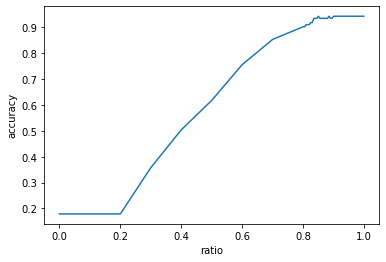

In [5]:
x, y = [], []

for i in range(0, 80, 10):
    model = MyKPCA(ratio=i/100)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/100)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/100) +
          " accuracy:" + str(acc))

for i in range(800, 990, 5):
    model = MyKPCA(ratio=i/1000)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/1000)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/1000) +
          " accuracy:" + str(acc))

for i in range(9900, 10000, 10):
    model = MyKPCA(ratio=i/10000)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/10000)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/10000) +
          " accuracy:" + str(acc))

plt.xlabel('ratio')
plt.ylabel('accuracy')
plt.plot(x, y)
plt.show()

观察图像,不难发现在 $ratio=0.85$ 时,模型的精度已经达到了较高的水平,此时特征数为 48 个,KPCA 有效地降低了数据的维度,且最后的效果优于 PCA